In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/apple-appstore-apps/appleAppData.csv')

In [3]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [4]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [6]:
df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


In [7]:
df.isnull().sum().sort_values(ascending = False)

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

<Axes: >

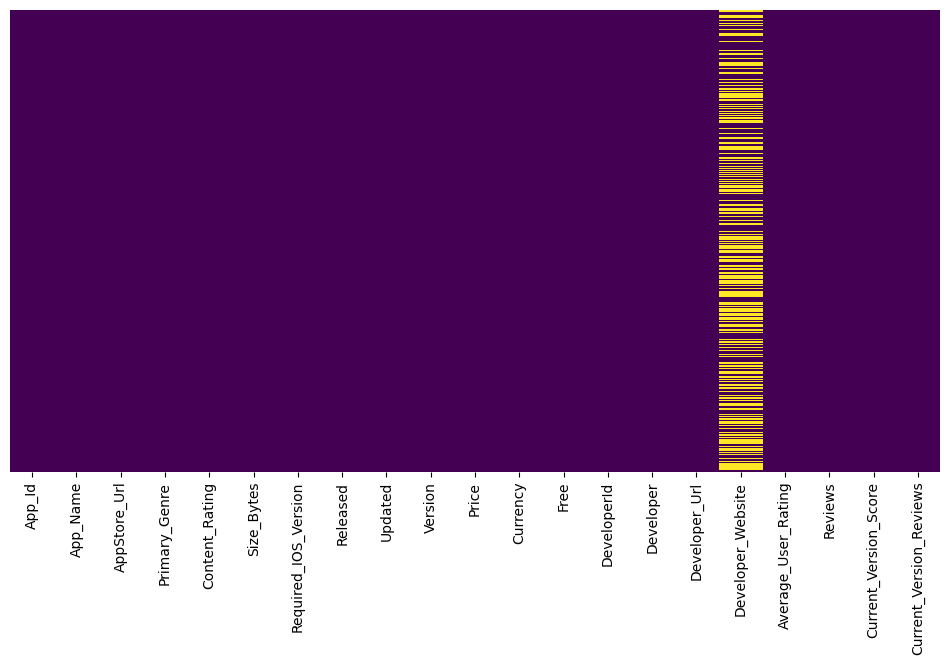

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
null_percentage = (df.isnull().sum()/len(df)*100)
print(null_percentage)

App_Id                      0.000000
App_Name                    0.000081
AppStore_Url                0.000000
Primary_Genre               0.000000
Content_Rating              0.000000
Size_Bytes                  0.018206
Required_IOS_Version        0.000000
Released                    0.000244
Updated                     0.000000
Version                     0.000000
Price                       0.039825
Currency                    0.000000
Free                        0.000000
DeveloperId                 0.000000
Developer                   0.000000
Developer_Url               0.090135
Developer_Website          52.340748
Average_User_Rating         0.000000
Reviews                     0.000000
Current_Version_Score       0.000000
Current_Version_Reviews     0.000000
dtype: float64


In [10]:
null_percentage.sort_values(ascending = False)

Developer_Website          52.340748
Developer_Url               0.090135
Price                       0.039825
Size_Bytes                  0.018206
Released                    0.000244
App_Name                    0.000081
Free                        0.000000
Current_Version_Score       0.000000
Reviews                     0.000000
Average_User_Rating         0.000000
Developer                   0.000000
DeveloperId                 0.000000
App_Id                      0.000000
Currency                    0.000000
Version                     0.000000
Updated                     0.000000
Required_IOS_Version        0.000000
Content_Rating              0.000000
Primary_Genre               0.000000
AppStore_Url                0.000000
Current_Version_Reviews     0.000000
dtype: float64

<Axes: >

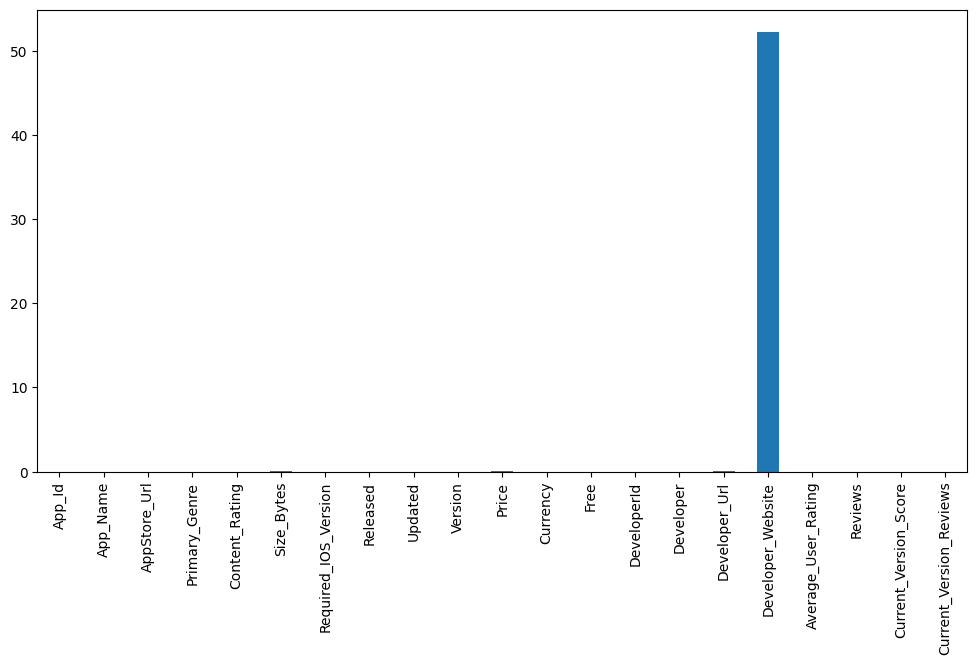

In [11]:
plt.figure(figsize = (12,6))
null_percentage.plot(kind = 'bar')

In [12]:
df.drop(columns = 'Developer_Website',axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [13]:
df['Price'].fillna(df['Price'].mean(),inplace=True)
df['Size_Bytes'].fillna(df['Size_Bytes'].mean(),inplace = True)
df.isnull().sum().sort_values(ascending=False)

Developer_Url              1109
Released                      3
App_Name                      1
App_Id                        0
Currency                      0
Current_Version_Score         0
Reviews                       0
Average_User_Rating           0
Developer                     0
DeveloperId                   0
Free                          0
Price                         0
Version                       0
Updated                       0
Required_IOS_Version          0
Size_Bytes                    0
Content_Rating                0
Primary_Genre                 0
AppStore_Url                  0
Current_Version_Reviews       0
dtype: int64

In [14]:
df.dropna(subset=['Developer_Url'],inplace=True)
df.dropna(subset=['Released'],inplace=True)
df.dropna(subset=['App_Name'],inplace=True)

In [15]:
df.isnull().sum()

App_Id                     0
App_Name                   0
AppStore_Url               0
Primary_Genre              0
Content_Rating             0
Size_Bytes                 0
Required_IOS_Version       0
Released                   0
Updated                    0
Version                    0
Price                      0
Currency                   0
Free                       0
DeveloperId                0
Developer                  0
Developer_Url              0
Average_User_Rating        0
Reviews                    0
Current_Version_Score      0
Current_Version_Reviews    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
any_duplicates = df.duplicated(subset=['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews']).any()
any_duplicates

False

In [18]:
df['App_Name'].duplicated().sum()

6850

In [19]:
df['App_Name'].value_counts().sort_values(ascending = False)

App_Name
Vanguard              6
Linker                5
Bloom                 5
Currency Converter    4
Awaken                4
                     ..
TwoFactor             1
TWOTOO                1
TwoWayStreaming       1
TWSpeed Telecom       1
Sổ Điểm Thông Minh    1
Name: count, Length: 1222413, dtype: int64

In [20]:
df[df['App_Name'] == 'Vanguard']

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
478488,com.vanguard.app,Vanguard,https://apps.apple.com/us/app/vanguard/id33518...,Finance,4+,160800768.0,10.0,2009-10-24T19:14:54Z,2021-08-26T19:55:20Z,11.14,0.0,USD,True,335186212,"The Vanguard Group, Inc.",https://apps.apple.com/us/developer/the-vangua...,4.73977,167472,4.73977,167472
624553,com.omr.vngu,Vanguard,https://apps.apple.com/us/app/vanguard/id15822...,Games,4+,191240192.0,10.0,2021-08-27T07:00:00Z,2021-08-27T12:16:53Z,1.0,0.0,USD,True,1582197355,omar naser,https://apps.apple.com/us/developer/omar-naser...,3.00000,2,3.00000,2
871735,br.com.vanguardhome,Vanguard,https://apps.apple.com/us/app/vanguard/id14660...,Lifestyle,4+,87821312.0,9.0,2020-03-25T07:00:00Z,2021-10-05T23:12:01Z,1.1.10,0.0,USD,True,1459748843,Vanguard Home Empreendimentos Imobiliarios LTDA,https://apps.apple.com/us/developer/vanguard-h...,0.00000,0,0.00000,0
1024185,com.proptex.vanguard.barcelona,Vanguard,https://apps.apple.com/us/app/vanguard/id15690...,Productivity,17+,35228672.0,13.0,2021-06-11T07:00:00Z,2021-09-05T08:02:33Z,1.0.11,0.0,USD,True,1569057203,3k CO-LIVING $ ACCOMODATION,https://apps.apple.com/us/developer/3k-co-livi...,0.00000,0,0.00000,0
1066082,com.partnernogueiraalliance1.Vanguard1,Vanguard,https://apps.apple.com/us/app/vanguard/id14412...,Reference,4+,24201216.0,12.0,2018-11-13T01:31:37Z,2021-03-24T12:38:41Z,1.1.2,0.0,USD,True,1441217235,TONANDEL PTY LTD,https://apps.apple.com/us/developer/tonandel-p...,0.00000,0,0.00000,0
1094792,com.justbrands.highstreet.vanguard.ipad,Vanguard,https://apps.apple.com/us/app/vanguard/id91943...,Shopping,4+,68751360.0,13.0,2014-09-28T16:38:41Z,2021-07-26T09:36:18Z,2.114.14,0.0,USD,True,849091402,Just Brands B.V.,https://apps.apple.com/us/developer/just-brand...,5.00000,1,5.00000,1


Size_Bytes, Price, DeveloperId, Average_User_Rating, Reviews, Current_Version_Score, Current_Version_Reviews

In [21]:
df['Size_Bytes'].unique()

array([2.19934720e+07, 1.31358720e+07, 2.19432960e+07, ...,
       1.19404544e+08, 5.96570000e+05, 5.06896000e+05])

In [22]:
df['Price'].unique()

array([0.00000000e+00, 2.99000000e+00, 1.99000000e+00, 9.90000000e-01,
       4.99000000e+00, 9.99000000e+00, 5.99000000e+00, 6.99000000e+00,
       1.69900000e+01, 1.99900000e+01, 3.99900000e+01, 5.99900000e+01,
       8.99000000e+00, 7.99000000e+00, 1.89900000e+01, 3.99000000e+00,
       2.49900000e+01, 1.49900000e+01, 2.89900000e+01, 2.19900000e+01,
       1.39900000e+01, 1.09900000e+01, 1.19900000e+01, 1.29990000e+02,
       2.29900000e+01, 1.39990000e+02, 2.59900000e+01, 1.29900000e+01,
       4.99900000e+01, 2.39900000e+01, 1.19990000e+02, 7.99900000e+01,
       1.79900000e+01, 4.99990000e+02, 2.49990000e+02, 1.99990000e+02,
       2.29990000e+02, 3.49900000e+01, 2.09900000e+01, 9.99900000e+01,
       3.39900000e+01, 5.49900000e+01, 4.59900000e+01, 4.49900000e+01,
       2.99900000e+01, 6.99900000e+01, 2.79900000e+01, 8.49900000e+01,
       6.49900000e+01, 1.59900000e+01, 2.69900000e+01, 3.59900000e+01,
       4.09900000e+01, 1.74990000e+02, 1.49990000e+02, 9.49900000e+01,
      

In [23]:
df['DeveloperId'].unique()

array([1375410542, 1031572001, 1457024163, ..., 1532733861, 1522287989,
       1438594214])

In [24]:
df['Average_User_Rating'].unique()

array([0.     , 5.     , 4.78132, ..., 4.00352, 3.91608, 4.82733])

In [25]:
df['Reviews'].unique()

array([    0,     1,  1285, ..., 12691, 35476, 10481])

In [26]:
df['Current_Version_Score'].unique()

array([0.     , 5.     , 4.78132, ..., 4.00352, 3.91608, 4.82733])

In [27]:
df['Content_Rating'].unique()

array(['4+', '17+', '9+', '12+', 'Not yet rated'], dtype=object)

In [28]:
df['Size_MB'] = df['Size_Bytes'].apply(lambda x:(float(x) / 1024)/1024)

In [29]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0.0,0,0.0,0,78.059570
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0.0,0,0.0,0,61.695312


In [30]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(columns = 'Free',axis=1, inplace= True )

In [31]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Type
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609,Free
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344,Free
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758,Free
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0.0,0,0.0,0,78.059570,Paid
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0.0,0,0.0,0,61.695312,Free


In [32]:
df['Content_Rating'].unique()

array(['4+', '17+', '9+', '12+', 'Not yet rated'], dtype=object)

In [33]:
df['Content_Rating'] = df['Content_Rating'].replace("4+","Children")
df['Content_Rating'] = df['Content_Rating'].replace("9+","Kids")
df['Content_Rating'] = df['Content_Rating'].replace("12+","Teens")
df['Content_Rating'] = df['Content_Rating'].replace("17+","Adults")
df['Content_Rating'] = df['Content_Rating'].replace("Not yet rated","Everyone")

In [34]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Type
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609,Free
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344,Free
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758,Free
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0.0,0,0.0,0,78.059570,Paid
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Children,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0.0,0,0.0,0,61.695312,Free


In [35]:
df['Reviews'].min()

0

In [36]:
df['Reviews'].max()

22685334

In [37]:
df['Reviews'].value_counts()

Reviews
0         683549
1         140293
2          71672
3          44834
4          30651
           ...  
14108          1
117042         1
19351          1
4741           1
10481          1
Name: count, Length: 13667, dtype: int64

In [38]:
df['ReviewCategory'] = pd.cut(
  df['Reviews'], 
  bins=[0,10000,500000,1000000,22685334],
  labels=['0 to 10k', '10k to 500k', '500k to 1M', 'More than 1M']
)

df['ReviewCategory'] = df['ReviewCategory'].cat.add_categories('NoReview') 
df['ReviewCategory'] = df['ReviewCategory'].fillna('NoReview')

In [39]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Type,ReviewCategory
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609,Free,NoReview
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344,Free,0 to 10k
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758,Free,NoReview
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0.0,0,0.0,0,78.059570,Paid,NoReview
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Children,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0.0,0,0.0,0,61.695312,Free,NoReview


In [40]:
df['ReviewCategory'].value_counts()

ReviewCategory
NoReview        683549
0 to 10k        538691
10k to 500k       6725
More than 1M       152
500k to 1M         146
Name: count, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229263 entries, 0 to 1230375
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   App_Id                   1229263 non-null  object  
 1   App_Name                 1229263 non-null  object  
 2   AppStore_Url             1229263 non-null  object  
 3   Primary_Genre            1229263 non-null  object  
 4   Content_Rating           1229263 non-null  object  
 5   Size_Bytes               1229263 non-null  float64 
 6   Required_IOS_Version     1229263 non-null  object  
 7   Released                 1229263 non-null  object  
 8   Updated                  1229263 non-null  object  
 9   Version                  1229263 non-null  object  
 10  Price                    1229263 non-null  float64 
 11  Currency                 1229263 non-null  object  
 12  DeveloperId              1229263 non-null  int64   
 13  Developer                1229263

## What are the top 10 most popular app categories in terms of the number of apps available?

In [42]:

top_10_categories = df['Primary_Genre'].value_counts().head(10)
print(top_10_categories)

Primary_Genre
Games               193641
Business            128203
Education           119114
Utilities            93937
Lifestyle            84493
Food & Drink         72815
Health & Fitness     60682
Productivity         59389
Entertainment        53076
Shopping             49493
Name: count, dtype: int64


## Which app has the highest user rating?

In [43]:

highest_user_rating_app = df[df['Average_User_Rating'] == df['Average_User_Rating'].max()]['App_Name'].values[0]
print(highest_user_rating_app)


A-Books


## What is the distribution of app prices in the dataset?

In [44]:

app_prices_distribution = df['Price'].value_counts()
print(app_prices_distribution)

Price
0.00      1126288
0.99        33810
1.99        19901
2.99        13243
4.99         8815
           ...   
899.99          4
799.99          3
239.99          3
599.99          3
189.99          2
Name: count, Length: 89, dtype: int64


## Which category has the highest average user rating?

In [45]:

highest_avg_rating_category = df.groupby('Primary_Genre')['Average_User_Rating'].mean().sort_values(ascending = False)
print(highest_avg_rating_category)

Primary_Genre
Weather                   2.594274
Games                     2.554565
Photo & Video             2.305483
Music                     2.253552
Book                      2.182689
Reference                 2.180691
Finance                   2.110937
Entertainment             2.021099
Social Networking         1.994184
Health & Fitness          1.848775
Lifestyle                 1.799929
Education                 1.769151
Sports                    1.728943
Medical                   1.719698
News                      1.628249
Magazines & Newspapers    1.602803
Navigation                1.520807
Graphics & Design         1.517075
Shopping                  1.514652
Stickers                  1.483230
Productivity              1.422830
Utilities                 1.407542
Travel                    1.295708
Business                  1.275922
Food & Drink              1.118196
Developer Tools           0.787644
Name: Average_User_Rating, dtype: float64


## What is the relationship between the size of an app and its price?

In [46]:

size_price_relation = df[['Size_MB', 'Price']].corr()
print(size_price_relation)

          Size_MB     Price
Size_MB  1.000000  0.056322
Price    0.056322  1.000000


## Which app has the highest number of user reviews?

In [47]:

highest_user_reviews_app = df[df['Reviews'] == df['Reviews'].max()]['App_Name'].values[0]
print(highest_user_reviews_app)

YouTube: Watch, Listen, Stream


## Is there a correlation between the size of an app and its user rating?

In [48]:

app_size_rating_correlation = df[['Size_MB', 'Average_User_Rating']].corr()
print(app_size_rating_correlation)

                      Size_MB  Average_User_Rating
Size_MB              1.000000             0.048419
Average_User_Rating  0.048419             1.000000
